### **Project:Classification Task**

Data: 
## *Marketing campaigns for a bank.*

Feature description :

age (numeric)
job : type of job
marital : marital status
education
default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')
loan: has personal loan? (categorical: 'no','yes','unknown')
contact: contact communication type for current compaign.
month: last contact month of the current campaign
day_of_week: last contact day of the current campaign
duration: last contact duration, in seconds (numeric).
campaign: number of contacts performed during this campaign and for this client .
pdays: number of days that passed by after the client was last contacted from a previous campaign .
previous: number of contacts performed before this campaign and for this client .
poutcome: outcome of the previous marketing campaign .
emp.var.rate: employment variation rate - quarterly indicator (numeric)
cons.price.idx: consumer price index - monthly indicator (numeric)
cons.conf.idx: consumer confidence index - monthly indicator (numeric)
interest_rate: euribor 3 month rate - daily indicator (numeric)
nr.employed: number of employees - quarterly indicator (numeric)

### y - has the client subscribed a term deposit?(target)

Task:The project is to analyze the  dataset to know which features have the most effect to our target (y) ,then predict the future results of marketing companies based on available features using ML & DL.

# **classification goal is to predict if the client will subscribe(Deposit)**

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from google.colab import files
uploaded=files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [5]:
df = pd.read_csv('bank-additional-full.csv', sep = ';') # sep= ';' just to make them appear in a separated column form in the table

### **EXPLORING  and VISUALLIZING THE DATA**

> 



In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.info()
# so we have data containing 41188 instance with 21 col(feature) with no missing values and we have 11 feature categorized as objects while the others are float and int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.shape

(41188, 21)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df.describe()
#returns description of the data in the DataFrame
#DataFrame contains numerical data, the description contains these information for each column:
#count -mean - std - min -max - Percentiles

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.isnull().sum()
#to recheeck if there are any missing values in order to be handeled
#AND THE OUTPUT INDICATED NO MISSING VALUES

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df.nunique()
# returns a list of unique values in a list , range,PER FEATURE/COLUMN.

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [13]:
from IPython.core.interactiveshell import InteractiveShell ##code to solve plotting not appearing
InteractiveShell.ast_node_interactivity = "all"

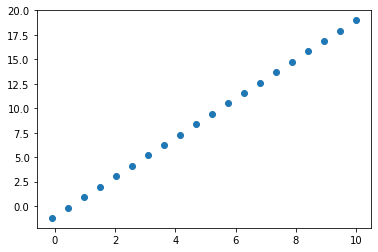

In [14]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-0.1, 10, 20)
y = 2 * X - 1
plt.scatter(X, y)

#code to solve plotting not appearing

<Figure size 720x576 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

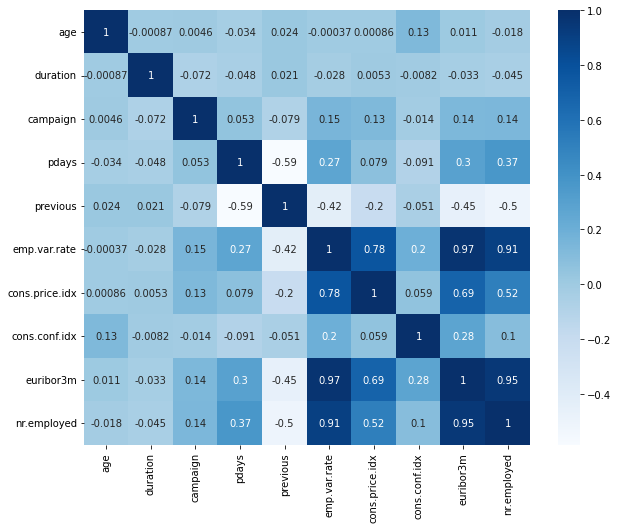

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show

*Heatmaps are used to show relationships between two variables, one plotted on each axis.we conducted that there is a high correlation between emp.var.rte and cons.price.idx,euribor3mand nr.employed which means that they have a strong relashionship between each other*


**IS THERE ANY IMBALANCE?**

Target values counts: 
 no     36548
yes     4640
Name: y, dtype: int64


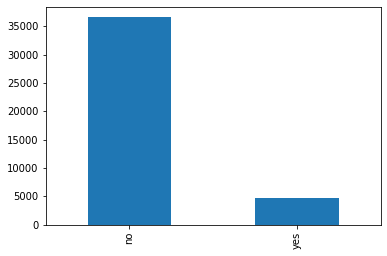

In [16]:
print("Target values counts: \n",df['y'].value_counts())
df['y'].value_counts().plot.bar()
plt.show()

In [17]:
class_values = (df['y'].value_counts()/df['y'].value_counts().sum())*100
class_values

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [18]:
fig = px.pie(df, values="nr.employed",names="y",title="deposit overall distribution")
fig.show()

All the previous codes crearly shows the im balance in the data and it will be sloved later on the notebook (handlling in balncce)

In [19]:
# add count columns for visualization purpose 
data_copy=df.copy()
data_copy["count"]=1

In [20]:
job=data_copy.groupby(["job","y"],as_index=False).sum()
fig=px.bar(x=job["job"],y=job["count"],color=job["y"],barmode='group',
           title="Distribution of jobs and deposit",
           labels={"x":"Jobs titles","y":"Number of clients","color":"y"})
fig.show()
# clients who work in administrative position made deposits followed by technicians and blue collar employees

In [21]:
marital=data_copy.groupby(["marital","y"],as_index=False).sum()
fig=px.bar(x=marital["marital"],y=marital["count"],color=marital["y"],barmode='group',
           title="Distribution of marital and deposit",
           labels={"x":"marital status ","y":"Number of clients","color":"deposit"})
fig.show()
#Married clients have made high deposits followed by single

In [22]:
education=data_copy.groupby(["education","y"],as_index=False).sum()
fig=px.bar(x=education["education"],y=education["count"],color=education["y"]
           ,barmode='group',title="Distribution of education and deposit",
           labels={"x":"education ","y":"Number of clients","color":"deposit"})
fig.show()
#clients who had atleast university degree had made te deposits followed by highschoo

In [23]:
fig = px.funnel(education.sort_values(by="count",ascending=False), x='count', y='education',color="y")
fig.show()
#another representation for the relation bet. education and deposit

In [24]:
loan=data_copy.groupby(["loan","y"],as_index=False).sum()
fig=px.bar(x=loan["loan"],y=loan["count"],color=loan["y"],barmode='group',
           title="Distribution of loan and deposit",
           labels={"x":"Has personal loan  ","y":"Number of clients","color":"deposit"})
fig.show()
#Graph shows campaign is conducted majorly for customers with no personal loans and therfore they are the ones that highly deposited as well

In [25]:
housing=data_copy.groupby(["housing","y"],as_index=False).sum()
fig=px.bar(x=housing["housing"],y=housing["count"],color=housing["y"],barmode='group',
           title="Distribution of housing and deposit",
           labels={"x":"Has housing loan  ","y":"Number of clients","color":"deposit"})
fig.show()
#this graph shows that when it came to housing loans they targeted both the ones with loan and the other without as the graph is almost balanced but the higher deposit actually came form the clients with house loans

In [26]:
poutcome=data_copy.groupby(["poutcome","y"],as_index=False).sum()
fig=px.bar(x=poutcome["poutcome"],y=poutcome["count"],color=poutcome["y"],barmode='group',
           title="Distribution of Poutcome and deposit",
           labels={"x":"output from previous compaign   ","y":"Number of clients","color":"deposit"})
fig.show()
#this graphs shows the realation between the outcome from the previous campaign with the deposit,it shows that they mainly focused on new clients rather than the ones for the previous campaign and the highest among three was the nonexixtent(new clients)

In [27]:
previous=data_copy.groupby(["previous","y","poutcome"],as_index=False).sum()
fig=px.bar(x=previous["previous"],y=previous["poutcome"],color=previous["y"],
           barmode='group',title="Effect of number of contacts",
           labels={"x":"number of contacts performed ","y":"outcome of previous campaign","color":"deposit"})
fig.show()

In [28]:
# function returns categorical variables
def return_categorical(df):

  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  return categorical_columns

Text(0.5, 1.0, 'job counts')

Text(0.5, 0, 'job')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'marital counts')

Text(0.5, 0, 'marital')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'education counts')

Text(0.5, 0, 'education')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'default counts')

Text(0.5, 0, 'default')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'housing counts')

Text(0.5, 0, 'housing')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'loan counts')

Text(0.5, 0, 'loan')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'contact counts')

Text(0.5, 0, 'contact')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'month counts')

Text(0.5, 0, 'month')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'day_of_week counts')

Text(0.5, 0, 'day_of_week')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'poutcome counts')

Text(0.5, 0, 'poutcome')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'y counts')

Text(0.5, 0, 'y')

Text(0, 0.5, 'Frequency')

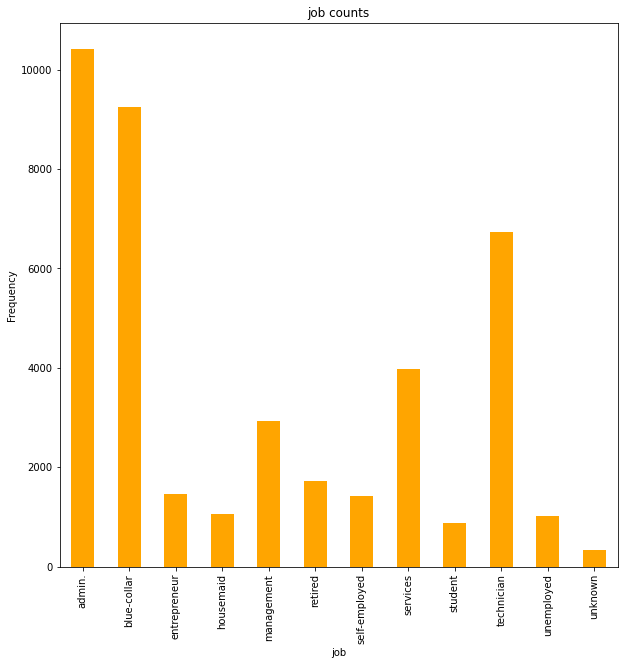

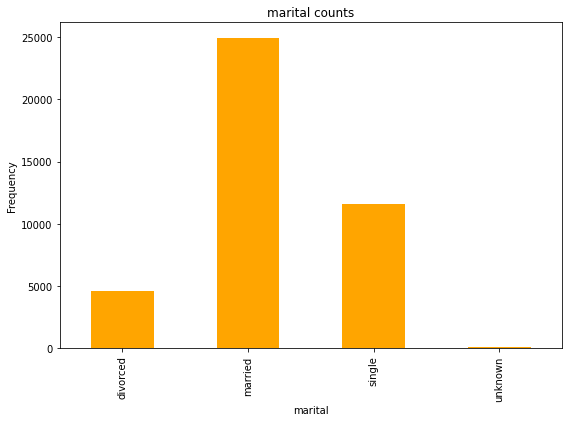

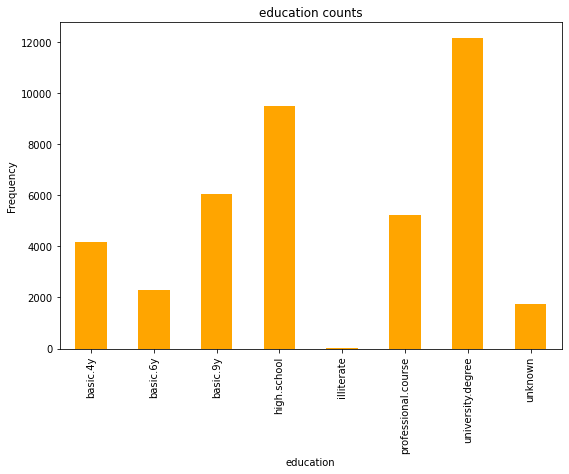

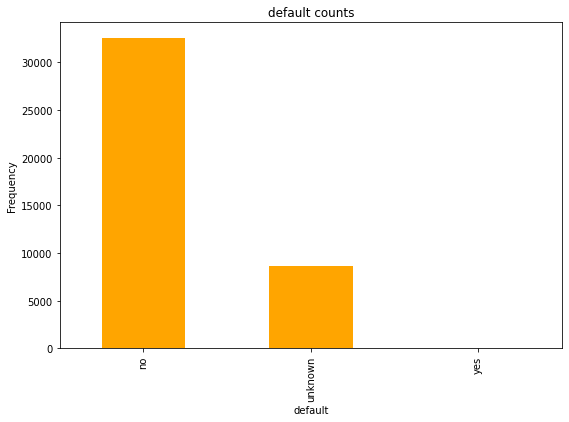

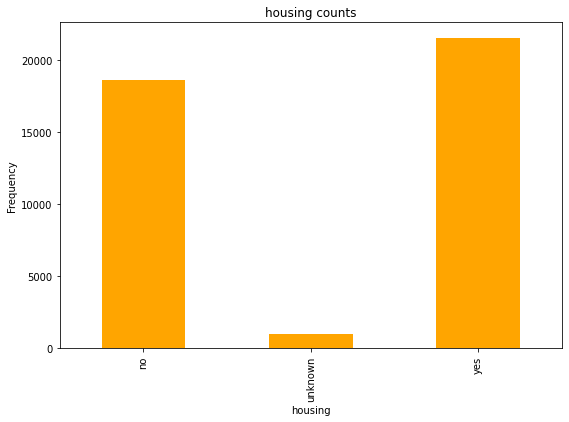

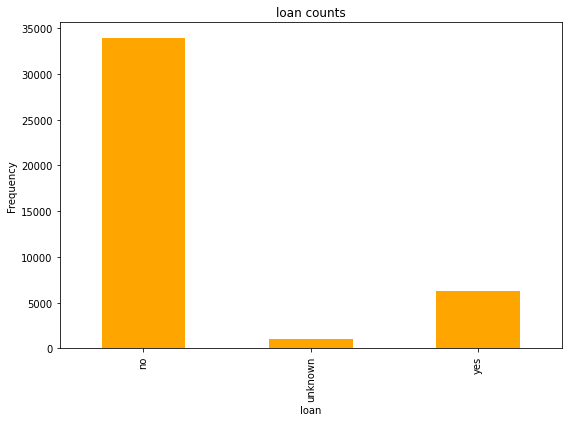

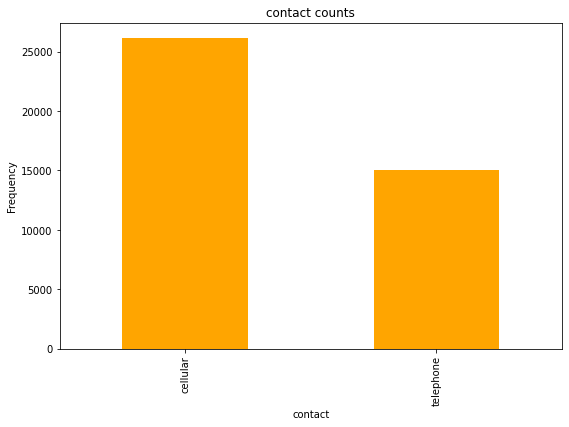

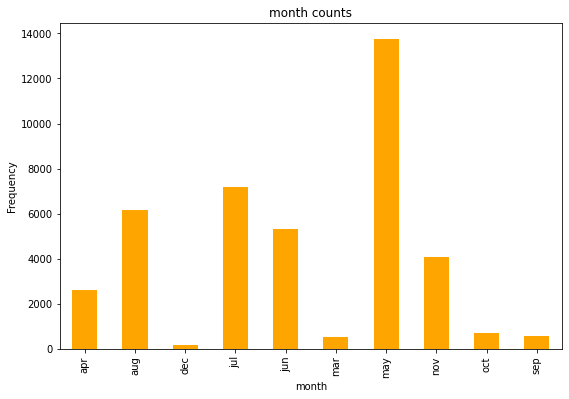

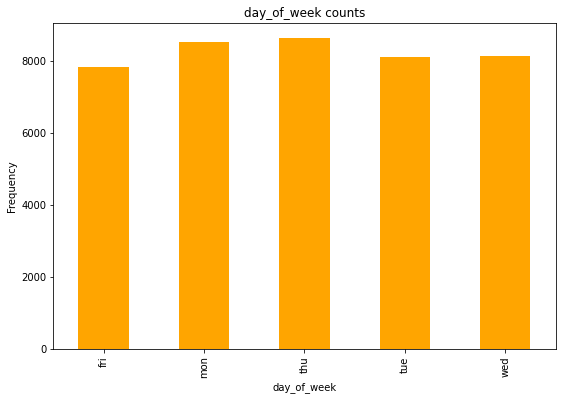

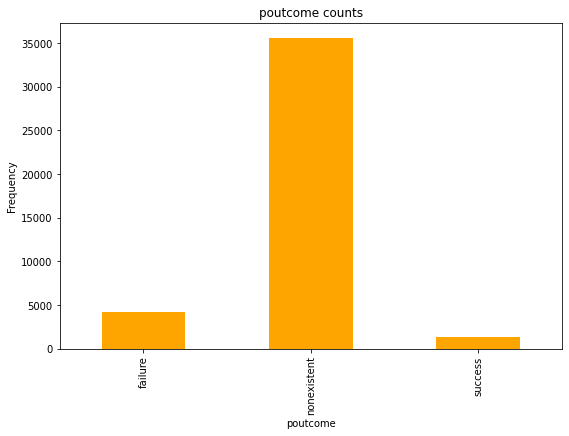

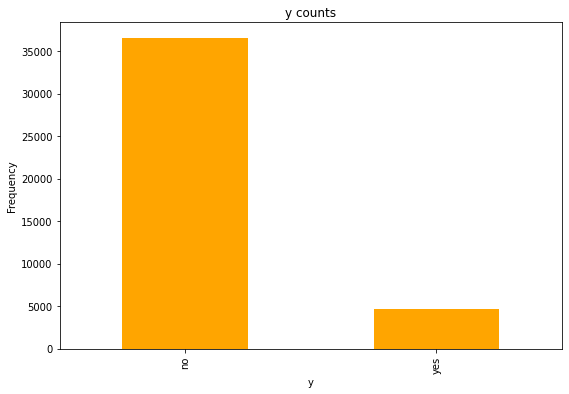

In [29]:
 # plotting graphs for all categorical columns to be able to visiualize the values
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    if len(counts) > 10:
      fig = plt.figure(figsize=(10, 10))
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='orange')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Distribution')

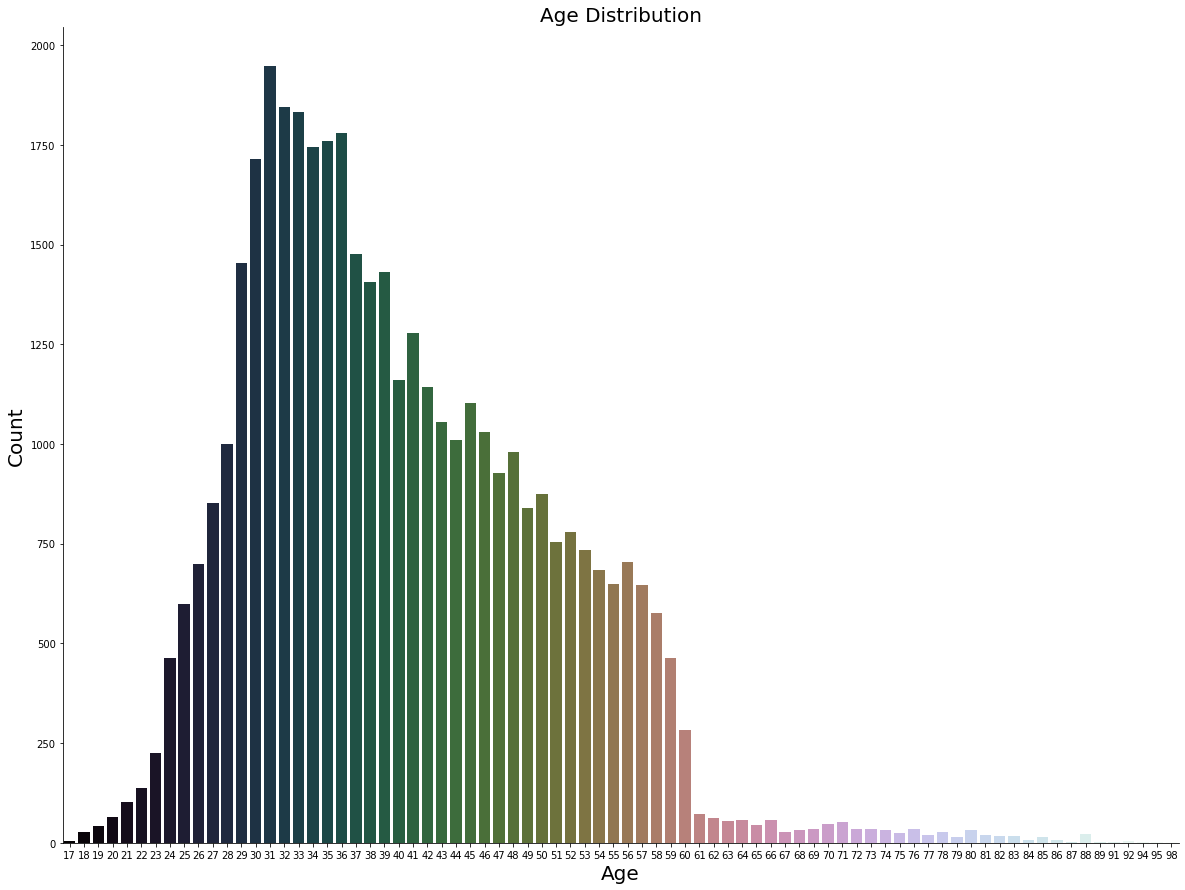

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.countplot(x = 'age',  palette="cubehelix", data = df)
ax.set_xlabel('Age', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Age Distribution', fontsize=20)
sns.despine()
#to see age distribution in the data(ave an extensive age range, from 18 to 95 years old. However, a majority of customers called is in the age of 30 and 40)

**OUTLIARS DETECTION AND HANDLING**

In [32]:
# finding outliers based on age
# Method 1- Z score

threshold = 3
ys= df['age']
mean_y = np.mean(ys)
stdev_y = np.std(ys)
fence_low  = mean_y-3*stdev_y
fence_high = mean_y+3*stdev_y
bank1= df.loc[(df['age'] > fence_low) & (df['age'] < fence_high)]
print('Zscore lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')


# Method 2- IQR method

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    print('IQR lower bound and upper bound are', fence_low, 'and', fence_high, 'respectively')
    return df_out
bank2= remove_outlier(df, 'age')


Zscore lower bound and upper bound are 8.760689990427288 and 71.28743082145968 respectively
IQR lower bound and upper bound are 9.5 and 69.5 respectively


In [33]:
#function to creat group of ages, this helps because we have 78 differente values here
bank2= bank2.copy()
def age(dataframe):
    q1 = dataframe['age'].quantile(0.25)
    q2 = dataframe['age'].quantile(0.50)
    q3 = dataframe['age'].quantile(0.75)
    dataframe.loc[(dataframe['age'] <= q1), 'age'] = 1
    dataframe.loc[(dataframe['age'] > q1) & (dataframe['age'] <= q2), 'age'] = 2
    dataframe.loc[(dataframe['age'] > q2) & (dataframe['age'] <= q3), 'age'] = 3
    dataframe.loc[(dataframe['age'] > q3), 'age'] = 4 
    print (q1, q2, q3)
    return dataframe
age(bank2);

bank2.head(5)

32.0 38.0 47.0


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,2,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,1,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,3,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,4,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,4,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Text(0.5, 0, 'Type of job')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'job Distribution')

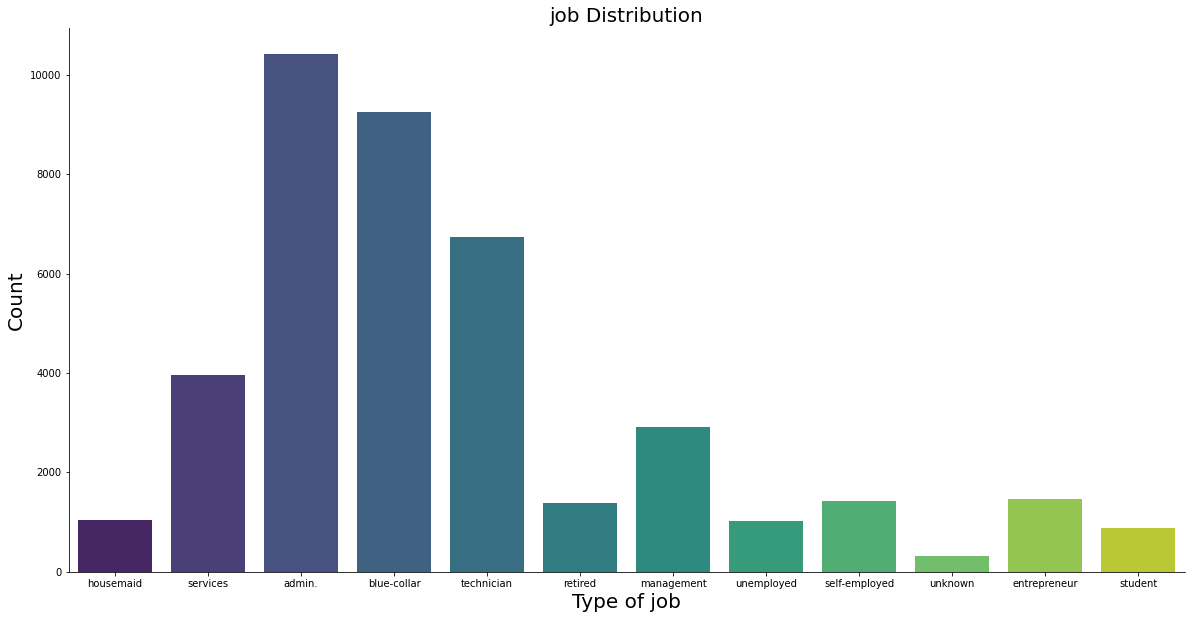

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'job',  palette="viridis", data = bank1)
ax.set_xlabel('Type of job', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('job Distribution', fontsize=20)
sns.despine()

age                  AxesSubplot(0.125,0.772143;0.168478x0.107857)
duration          AxesSubplot(0.327174,0.772143;0.168478x0.107857)
campaign          AxesSubplot(0.529348,0.772143;0.168478x0.107857)
pdays             AxesSubplot(0.731522,0.772143;0.168478x0.107857)
previous             AxesSubplot(0.125,0.642714;0.168478x0.107857)
emp.var.rate      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
cons.price.idx    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
cons.conf.idx     AxesSubplot(0.731522,0.642714;0.168478x0.107857)
euribor3m            AxesSubplot(0.125,0.513286;0.168478x0.107857)
nr.employed       AxesSubplot(0.327174,0.513286;0.168478x0.107857)
dtype: object

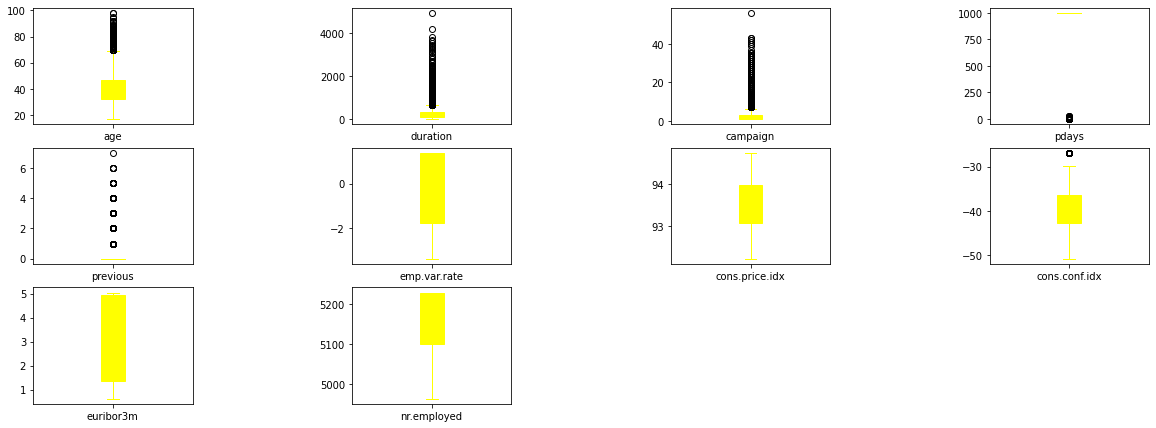

In [35]:
num_data=df.select_dtypes(exclude=["object"])
num_data.plot(subplots =True, kind = 'box', layout = (6,4), figsize = (20,15),patch_artist=True,color="yellow")
plt.subplots_adjust(wspace = 1)
#we will work on the numeric datasets and exclude the object columns 

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



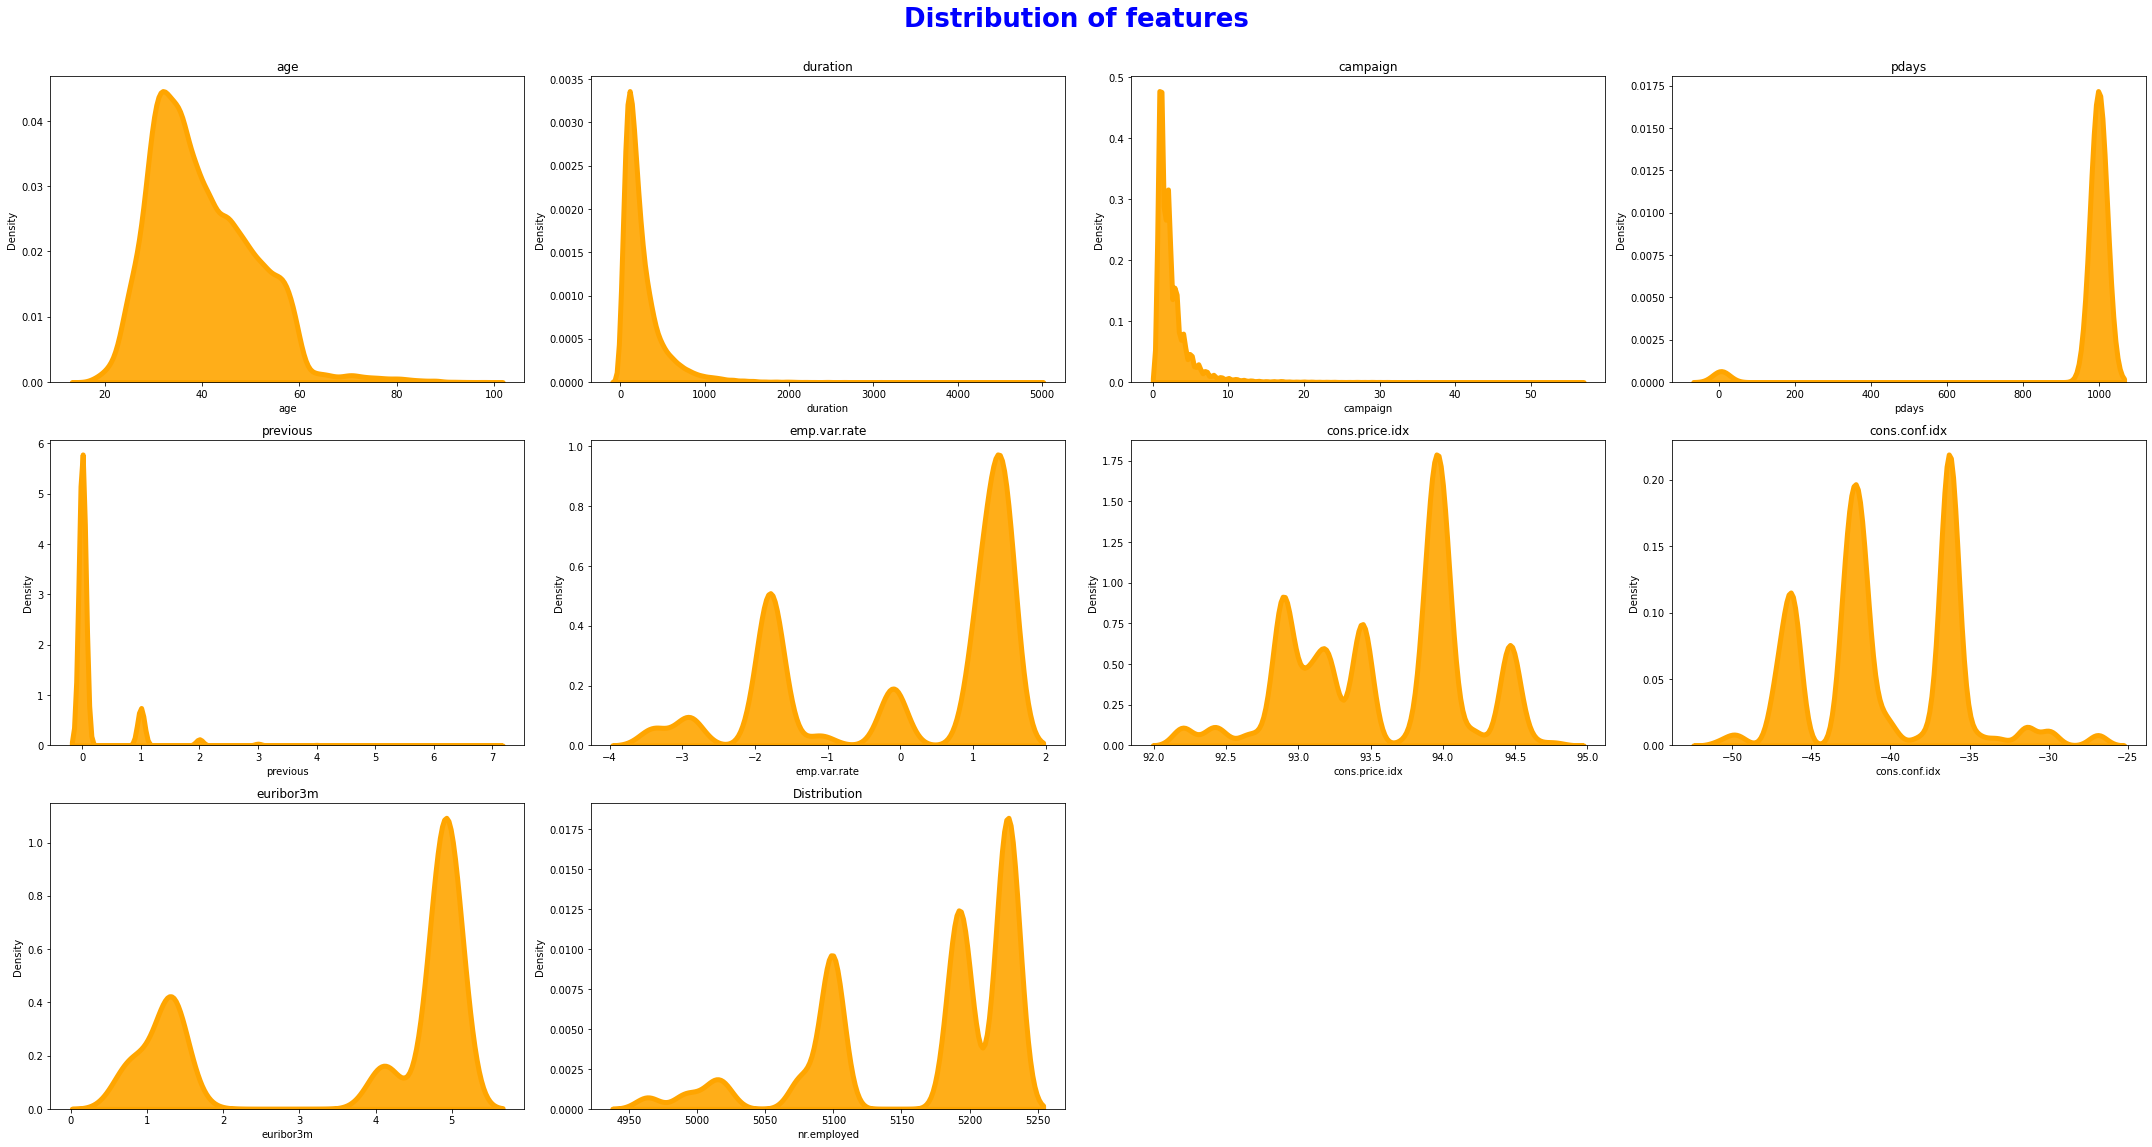

In [36]:
plt.figure(figsize = (30,30))
for ax, col in enumerate(num_data.columns[:24]):
    plt.subplot(6,4, ax + 1)
    plt.title(col)
    plotting = sns.kdeplot(x = num_data[col],fill=True, common_norm=False, color="orange",alpha=.9, linewidth=5);
    
plt.tight_layout()
plt.title('Distribution')
plotting.figure.suptitle(' Distribution of features ',y=1.02,x=0.5, size = 26, color = "B", weight='bold');
#check features distribution as we can see more clear the distribution of the features we have
#mainly pdays,previous,y,duration they don't have normaldistribution

**Relationship study between duration and target feature anf it indicates that more the duration the calls were, they had higher probability in making a deposit**

Text(0.5, 1.0, 'Data distribution for duration')

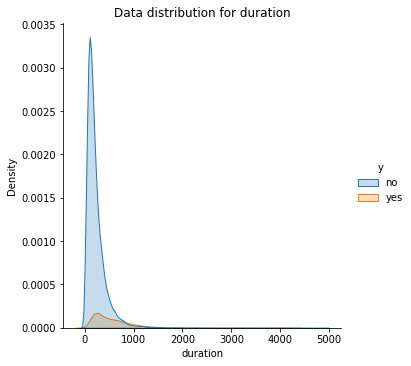

In [37]:
sns.displot(df, x="duration", hue="y", kind="kde", fill=True)
plt.title("Data distribution for duration")

In [38]:
df.groupby(["contact"]).mean()
#contact: contact communication type for current compaign

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
contact,,,,,,,,,,
cellular,39.968559,263.527846,2.405026,945.749235,0.252869,-0.387137,93.315957,-41.385959,3.095316,5152.284260
telephone,40.120513,249.173823,2.850106,991.542874,0.034100,0.896969,94.026993,-38.967469,4.535349,5192.671856


In [39]:
df.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


***Pivot tables are like the ones used in Excel i used it to provide multidimentional visiuallization for the data***

In [40]:
df.pivot_table(values="age",index="month",columns=["marital","contact"])
#this pivot table indicates the marital satus in adition to  the contact way and the age using month as an index

marital   divorced               married                single             \
contact   cellular  telephone   cellular  telephone   cellular  telephone   
month                                                                       
apr      45.182456  46.846154  43.586328  47.440860  32.806233  31.602941   
aug      43.515539  47.083333  44.689610  45.753086  33.203728  31.204819   
dec      62.133333  71.000000  52.945055  46.347826  30.232558  35.000000   
jul      44.791822  44.184874  41.740674  41.080402  32.119233  32.859116   
jun      47.300000  44.509804  42.686684  41.392315  30.590909  34.390316   
mar      59.051724  43.500000  46.080402  46.371429  31.464602  32.130435   
may      42.789377  43.858811  39.369281  41.318482  32.561478  34.780315   
nov      45.286573  44.745098  42.580817  41.465649  35.183896  33.576577   
oct      62.078431  51.562500  50.473354  45.325000  31.450262  32.724138   
sep      58.175000  50.100000  49.925532  46.673469  30.037500  29.793103   

marital    unknown            
contact   cellular telephone  
month                         
apr      42.333333       NaN  
aug      41.600000       NaN  
dec            NaN       NaN  
jul      42.777778       NaN  
jun      34.000000   48.0000  
mar      36.666667       NaN  
may      35.764706   40.4375  
nov      42.166667   50.0000  
oct      30.500000   31.0000  
sep            NaN       NaN

In [41]:
df.pivot_table(values="age",index="job",columns=["marital","contact"])
#this pivot table indicates the marital satus in adition to  the contact way and the age using job as an index

marital         divorced               married                single  \
contact         cellular  telephone   cellular  telephone   cellular   
job                                                                    
admin.         43.382318  43.092551  40.513925  39.885876  33.272467   
blue-collar    42.762803  42.921569  41.223516  40.498864  32.769231   
entrepreneur   43.460870  45.265625  42.414876  42.673820  36.045113   
housemaid      49.979167  49.092308  47.029787  43.778502  37.549296   
management     45.071429  47.814815  43.962555  43.370014  33.590116   
retired        66.942623  58.625000  63.533981  57.279539  55.327586   
self-employed  43.465909  41.355556  42.400722  41.960000  32.291498   
services       42.110749  42.048889  40.303709  39.323000  32.138418   
student        35.875000  27.000000  31.730769  28.733333  24.944969   
technician     41.930851  42.380952  40.420302  41.391913  33.306548   
unemployed     43.081081  41.900000  41.695767  41.652344  33.006098   
unknown        57.375000  40.600000  49.273504  47.324786  37.289474   

marital                     unknown             
contact        telephone   cellular  telephone  
job                                             
admin.         34.609982  36.153846  31.000000  
blue-collar    34.222222  41.250000  42.000000  
entrepreneur   34.442857  35.500000  31.000000  
housemaid      39.812500  40.000000        NaN  
management     34.808917        NaN  51.000000  
retired        56.285714  66.000000  57.666667  
self-employed  35.856061  36.750000  50.000000  
services       31.867133  34.500000  42.750000  
student        27.622340  30.000000        NaN  
technician     34.873147  30.222222  40.333333  
unemployed     33.724138  46.500000  50.000000  
unknown        35.888889  47.000000  32.000000

In [42]:
df.pivot_table(values="cons.price.idx",index="education",columns=["marital"])
##this pivot table indicates the values of cons.price.idx(: consumer price index)with indexing the eduation level along with indicating the marital satus

marital,divorced,married,single,unknown
education,,,,
basic.4y,93.694178,93.653568,93.655978,93.461167
basic.6y,93.622225,93.651518,93.654166,93.835167
basic.9y,93.678182,93.632212,93.575825,93.002000
high.school,93.594068,93.613508,93.535479,93.353714
illiterate,92.201000,93.494467,92.893000,NaN
professional.course,93.596248,93.586023,93.520423,93.914833
university.degree,93.548396,93.510954,93.452382,93.356710
unknown,93.692690,93.677726,93.598335,93.934111


In [43]:
df['y'] = df.y.apply(lambda x:0 if x=='no' else 1)
display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


**Lbl encoding**

In [44]:
corr = df.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75
#just to recheck the highly correlated columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pdays,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
emp.var.rate,NaN,NaN,NaN,NaN,NaN,1.000000,0.775334,NaN,0.972245,0.906970,NaN
cons.price.idx,NaN,NaN,NaN,NaN,NaN,0.775334,1.000000,NaN,NaN,NaN,NaN
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
euribor3m,NaN,NaN,NaN,NaN,NaN,0.972245,NaN,NaN,1.000000,0.945154,NaN
nr.employed,NaN,NaN,NaN,NaN,NaN,0.906970,NaN,NaN,0.945154,1.000000,NaN


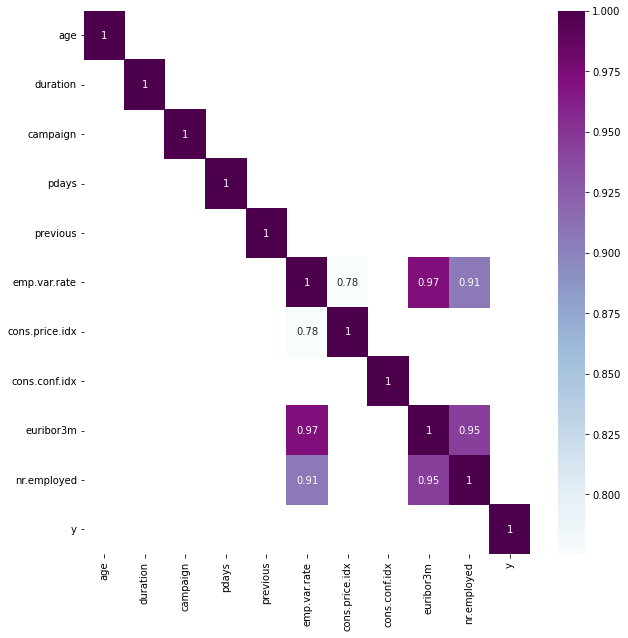

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_greater_than_75, annot = True , cmap = "BuPu");
#Highcorrelation can be seen here between emp. var rate and nr.employed as well as euribor3m and emp.var rate

**Creating a function for the categorial columns to display for each unique value andcounts for each value**

In [46]:
categorical_cols=df.select_dtypes(include='object')

In [47]:
for col in categorical_cols.columns:
    print("Unique values in column:",col )
    print(categorical_cols[col].unique())
    print(sep = '\n' )
    print("value counts in column",col )
    print(categorical_cols[col].value_counts())
    print("_________________________________")

Unique values in column: job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

value counts in column job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
_________________________________
Unique values in column: marital
['married' 'single' 'divorced' 'unknown']

value counts in column marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
_________________________________
Unique values in column: education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

value counts in column education
university.degree      12168
high.

In [48]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

pdays is the number of days that passed by after the client was last contacted from a previous campaign and 999 means (given from the data discriptiov)client was not previously contacted
I will replace the value 999 with 0

In [49]:
df.pdays = df.pdays.replace(999, 0)  
numeric_cols=df.select_dtypes(include=np.number)

In [50]:
df['pdays'].unique()

array([ 0,  6,  4,  3,  5,  1, 10,  7,  8,  9, 11,  2, 12, 13, 14, 15, 16,
       21, 17, 18, 22, 25, 26, 19, 27, 20])

In [51]:
df['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [52]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [54]:
df  = pd.get_dummies(df, drop_first = True)


# **Splitting the data set**

In [55]:
x = df.drop("y", axis=1)
y = df['y']
x.sample()

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
22366,41,163,1,0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0


In [56]:
y_train.shape

(30891,)

# **Balancing (SMOTE)**

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train) # fit predictor and target variable

print('Original data shape', len(x_train))
print('Resampled data shape', len(x_smote))

Original data shape 30891
Resampled data shape 54808


# **Scalling:**

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## **BUILDING MODELS:**

# DEEP LEARNING:ANN

In [59]:
import tensorflow as tf
from tensorflow import keras

In [60]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping

In [61]:
from keras.api._v2.keras import layers
from keras.api._v2.keras.layers.experimental import preprocessing
from keras.api._v2.keras import Sequential

In [62]:
from tensorflow.keras.layers import Dense

In [63]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(sc.fit_transform(x_smote), y_smote,validation_split=0.40, batch_size = 30, epochs = 20)

Epoch 1/20
1097/1097 [==============================] - 8s 4ms/step - loss: 0.4041 - accuracy: 0.8322 - val_loss: 0.8233 - val_accuracy: 0.4335
Epoch 2/20
1097/1097 [==============================] - 5s 4ms/step - loss: 0.2868 - accuracy: 0.8731 - val_loss: 0.5426 - val_accuracy: 0.7996
Epoch 3/20
1097/1097 [==============================] - 6s 5ms/step - loss: 0.2485 - accuracy: 0.8902 - val_loss: 0.3972 - val_accuracy: 0.8793
Epoch 4/20
1097/1097 [==============================] - 5s 4ms/step - loss: 0.2282 - accuracy: 0.8974 - val_loss: 0.3223 - val_accuracy: 0.9109
Epoch 5/20
1097/1097 [==============================] - 6s 5ms/step - loss: 0.2183 - accuracy: 0.9017 - val_loss: 0.2849 - val_accuracy: 0.9228
Epoch 6/20
1097/1097 [==============================] - 6s 5ms/step - loss: 0.2123 - accuracy: 0.9025 - val_loss: 0.2725 - val_accuracy: 0.9278
Epoch 7/20
1097/1097 [==============================] - 6s 5ms/step - loss: 0.2082 - accuracy: 0.9047 - val_loss: 0.2497 - val_accuracy:


The ANN reached accuracy by 95% which is considered a great performance of the model,but we will tune the hyperparameters again trying to find better berformance

In [135]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = x_train.shape[1]))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(sc.fit_transform(x_smote), y_smote,validation_split=0.33, batch_size = 30, epochs = 80)

Epoch 1/80
1225/1225 [==============================] - 6s 4ms/step - loss: 0.4488 - accuracy: 0.8071 - val_loss: 0.5250 - val_accuracy: 0.7492
Epoch 2/80
1225/1225 [==============================] - 5s 4ms/step - loss: 0.2961 - accuracy: 0.8842 - val_loss: 0.2442 - val_accuracy: 0.9138
Epoch 3/80
1225/1225 [==============================] - 5s 4ms/step - loss: 0.2466 - accuracy: 0.9014 - val_loss: 0.1699 - val_accuracy: 0.9468
Epoch 4/80
1225/1225 [==============================] - 5s 4ms/step - loss: 0.2261 - accuracy: 0.9070 - val_loss: 0.1491 - val_accuracy: 0.9560
Epoch 5/80
1225/1225 [==============================] - 5s 4ms/step - loss: 0.2150 - accuracy: 0.9093 - val_loss: 0.1278 - val_accuracy: 0.9640
Epoch 6/80
1225/1225 [==============================] - 5s 4ms/step - loss: 0.2076 - accuracy: 0.9104 - val_loss: 0.1245 - val_accuracy: 0.9651
Epoch 7/80
1225/1225 [==============================] - 5s 4ms/step - loss: 0.2021 - accuracy: 0.9112 - val_loss: 0.1199 - val_accuracy:

The ANN reached accuracy by 97% which is considered a great performance of the model,i reached this percentage after multiple hyperparameter tunning either in the layer numbers or the activation method

# **SVM**

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 0)

In [65]:
from sklearn import svm
SVM_model=svm.SVC() 
SVM_model.fit(x_train,y_train)

SVC()

In [66]:
y_pred=SVM_model.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[4474 1010]
 [ 765 4713]]


Text(0, 0, '4474')

Text(1, 0, '1010')

Text(0, 1, '765')

Text(1, 1, '4713')

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.05, 'Confusion Matrix')

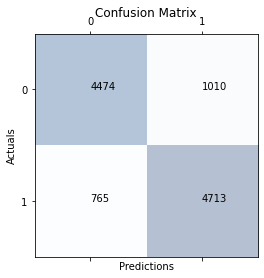

In [69]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [70]:
from sklearn import metrics

In [71]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'SVM_model model Accuracy: {100*accracy:.3} %')
print (f'SVM_model model f1_score: {100*f1_score:.3} %')
print (f'SVM_model model precision: {100*precision:.3} %')
print (f'SVM_model model recall: {100*recall:.3}  %')

SVM_model model Accuracy: 83.8 %
SVM_model model f1_score: 84.2 %
SVM_model model precision: 82.4 %
SVM_model model recall: 86.0  %


Here SVM did not performe well as ANN this model reached 83.9% Accuracy which is an average result my be from the reasons that the SVM didn't performe very well is that due to the imbalance of the data althoug we used the SMOTE to cure this imbalance or may be due to data size and the dgree of complexity of the model with the data set provided

# **KNN**

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 0)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(x_train)
y_test = sc.transform(x_test)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [99]:
y_pred=knn.predict(x_test)

In [100]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[4681  803]
 [ 186 5292]]


Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.05, 'Confusion Matrix')

Text(0, 0, '4681')

Text(1, 0, '803')

Text(0, 1, '186')

Text(1, 1, '5292')

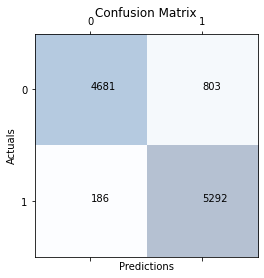

In [101]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])

In [102]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'KNN model Accuracy: {100*accracy:.3} %')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy: 91.0 %
KNN model f1_score: 91.5 %
KNN model precision: 86.8 %
KNN model recall: 96.6  %


KNN model was the least performing till now with 91% accuracy rate my justification to that the data has multiple features and dimantions or not reaching the perfect walue of (K)

In [114]:
error_rate = []
k_vals = range(1,35)

for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

KNeighborsClassifier(n_neighbors=21)

KNeighborsClassifier(n_neighbors=22)

KNeighborsClassifier(n_neighbors=23)

KNeighborsClassifier(n_neighbors=24)

KNeighborsClassifier(n_neighbors=25)

KNeighborsClassifier(n_neighbors=26)

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=28)

KNeighborsClassifier(n_neighbors=29)

KNeighborsClassifier(n_neighbors=30)

KNeighborsClassifier(n_neighbors=31)

KNeighborsClassifier(n_neighbors=32)

KNeighborsClassifier(n_neighbors=33)

KNeighborsClassifier(n_neighbors=34)

Text(0.5, 1.0, 'Error rate vs K')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error rate')

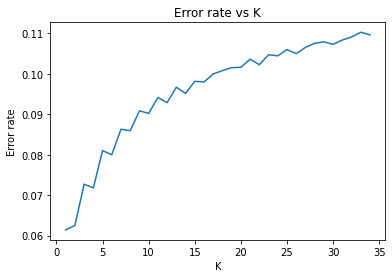

In [115]:
plt.plot(k_vals, error_rate)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')
#the error rate is almost increasing after k=3,so the rest are useless

**Decision Tree**

In [116]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 0)

In [117]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
DT_model=DecisionTreeClassifier() 
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [118]:
y_pred=DT_model.predict(x_test)

In [119]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[5052  432]
 [ 358 5120]]


Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.05, 'Confusion Matrix')

Text(0, 0, '5052')

Text(1, 0, '432')

Text(0, 1, '358')

Text(1, 1, '5120')

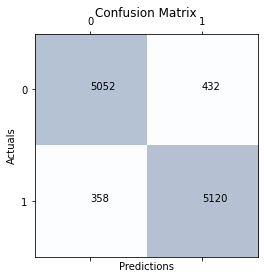

In [120]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

A way to detect and visiualize the most important features in the data set,mainly the most important are the duration,nr.employed,cons.conf.idx,contact_telephone and the bottom of the graph are the least important features

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f832f274190>)

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 53 artists>

([<matplotlib.axis.YTick at 0x7f832f47d450>,
 [Text(0, 0, 'education_illiterate'),
  Text(0, 0, 'default_yes'),
  Text(0, 0, 'marital_unknown'),
  Text(0, 0, 'month_mar'),
  Text(0, 0, 'month_dec'),
  Text(0, 0, 'job_unknown'),
  Text(0, 0, 'housing_unknown'),
  Text(0, 0, 'month_may'),
  Text(0, 0, 'loan_unknown'),
  Text(0, 0, 'month_jun'),
  Text(0, 0, 'month_sep'),
  Text(0, 0, 'job_retired'),
  Text(0, 0, 'job_self-employed'),
  Text(0, 0, 'month_nov'),
  Text(0, 0, 'month_aug'),
  Text(0, 0, 'job_housemaid'),
  Text(0, 0, 'job_unemployed'),
  Text(0, 0, 'poutcome_success'),
  Text(0, 0, 'job_student'),
  Text(0, 0, 'education_unknown'),
  Text(0, 0, 'education_basic.6y'),
  Text(0, 0, 'job_entrepreneur'),
  Text(0, 0, 'job_services'),
  Text(0, 0, 'loan_yes'),
  Text(0, 0, 'default_unknown'),
  Text(0, 0, 'job_technician'),
  Text(0, 0, 'job_management'),
  Text(0, 0, 'month_jul'),
  Text(0, 0, 'marital_single'),
  Text(0, 0, 'month_oct'),
  Text(0, 0, 'education_basic.9y'),
  Te

Text(0.5, 0, 'Relative Importance')

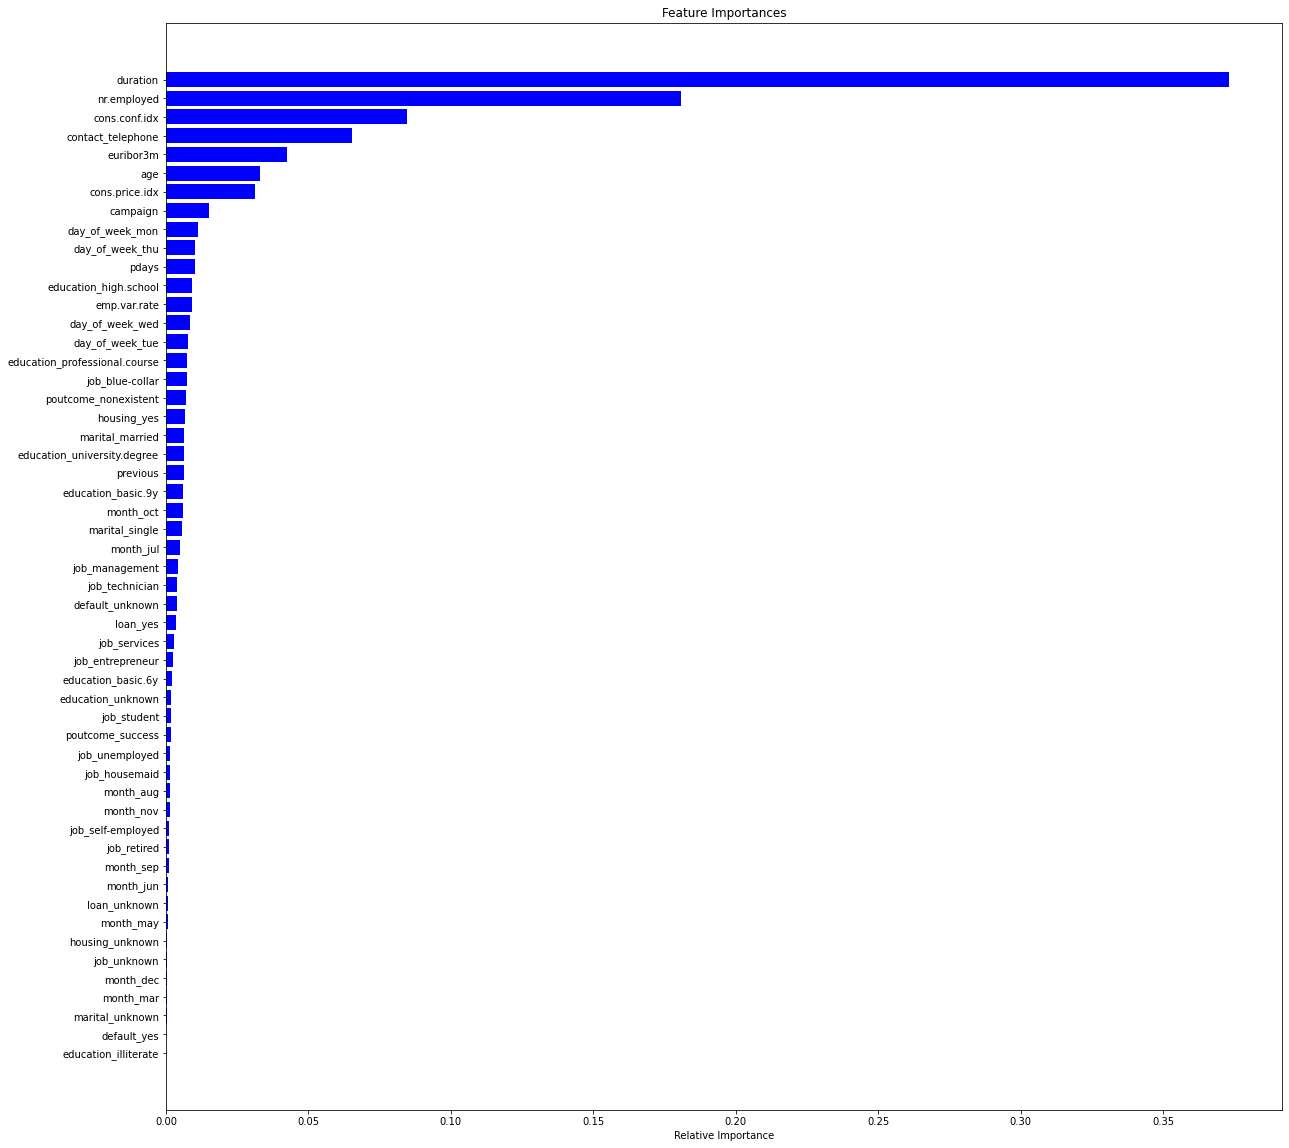

In [134]:
plt.subplots(figsize=(20,20))
features = x.columns
importances = DT_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# ***Finally we will conclude that the best performing model was ANN ,then KNN,Then SVM.***